In [1]:
from fastai.vision import *

In [2]:
data_path = Path('./chest_xray').absolute()
model_path = Path('./model').absolute()

In [3]:
data = ImageDataBunch.from_folder(data_path,
                                  valid_pct=0.2,
                                  size=256,
                                  ds_tfms=get_transforms()
                                 ).normalize(imagenet_stats)

In [4]:
print(data.classes, len(data.train_ds), len(data.valid_ds))

['NORMAL', 'PNEUMONIA'] 4685 1171


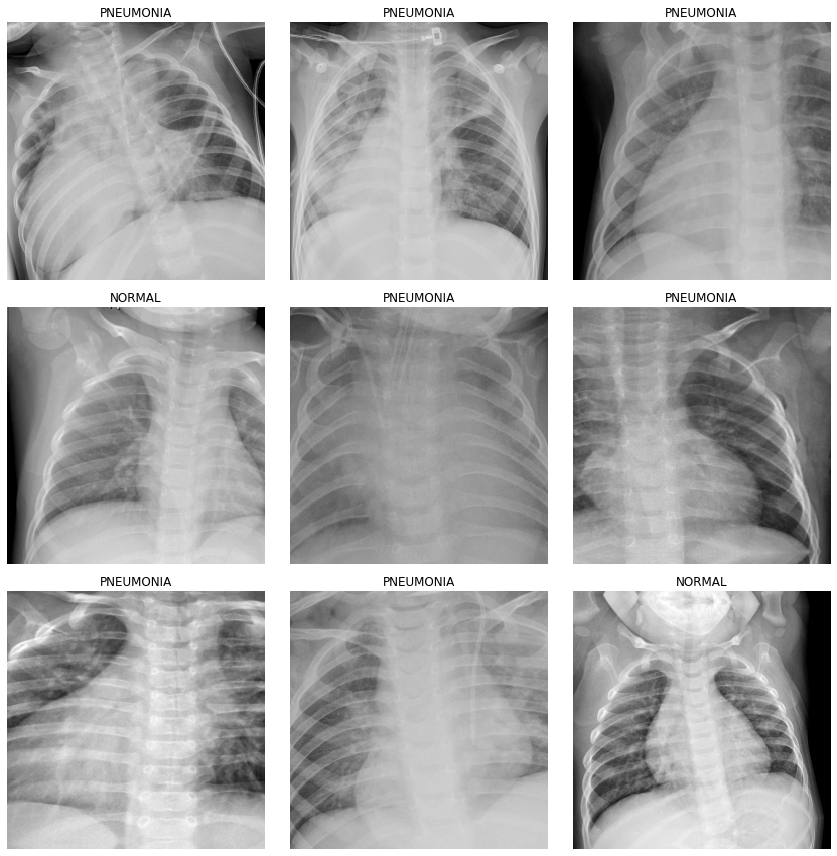

In [5]:
data.show_batch(rows=3)

In [5]:
learn = cnn_learner(data, 
                    models.resnet50, 
                    metrics=error_rate, 
                    model_dir=model_path)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [6]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.455047,0.481392,0.087959,00:47
1,0.285684,0.246412,0.079419,00:48
2,0.192232,0.145834,0.047822,00:47
3,0.163357,0.123052,0.042699,00:48
4,0.134611,0.115904,0.039283,00:48


In [7]:
learn.unfreeze()

In [8]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


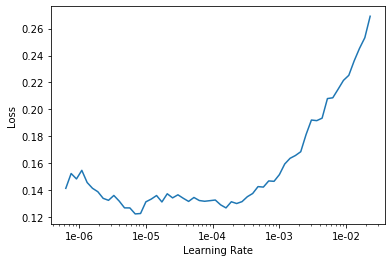

In [9]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(5, max_lr=3e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.139610,0.269749,0.081981,00:48
1,0.150576,0.085631,0.029035,00:49
2,0.115147,0.085486,0.024765,00:48
3,0.082100,0.078183,0.020495,00:48
4,0.066081,0.051042,0.014518,00:49
